In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tools.fig2grid import SeabornFig2Grid as sfg
from tools.hh_experiments_loading import load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
# loading the results
exps_flrd = "dumps/tuning"
chronics = pd.DataFrame()
progresses = pd.DataFrame()
for e_file_name in os.listdir(exps_flrd):
    expnt = load_exp(exps_flrd + e_file_name)
    chronic = exp_chronics_loader(expnt)
    progres = exp_progress_loader(expnt)
    mh_name = expnt.description["DomainDescription"]["DataFile"][expnt.description["DomainDescription"]["DataFile"].rfind("/MH")+3:-9]
    chronic["Meta-heuristic"] = mh_name
    chronic["Line type"] = "chronics"
    chronics = chronics.append(chronic, sort=False)
    progres["Meta-heuristic"] = mh_name
    progres["Line type"] = "best"
    progresses = progresses.append(progres, sort=False)

Running BRISE without the API!


In [3]:
# renaming to reflect it on the plots
column_names = {
    "iteration": "№ of evaluated configurations",
    "mutation_probability": "mutation probability",
    "mutation_type": "mutation",
    "lambda_": "lambda "
}
values = {
    "jMetalPySA": "jMetalPy simulated annealing",
    "jMetalPyES": "jMetalPy evolution strategy",
    "jMetalES": "jMetal evolution strategy",
    "PermutationSwapMutation": "Permutation",
    "ScrambleMutation": "Scramble",
}

for df in [chronics, progresses]:
    df.rename(columns=column_names, inplace=True)
    df.replace(values, inplace=True)

In [4]:
sns.set(context='talk', font_scale=1, rc={'figure.figsize':(16,4)}) # set up seaborn theme
plots_folder = "./plots/tuning/"
os.makedirs(plots_folder, exist_ok=True)

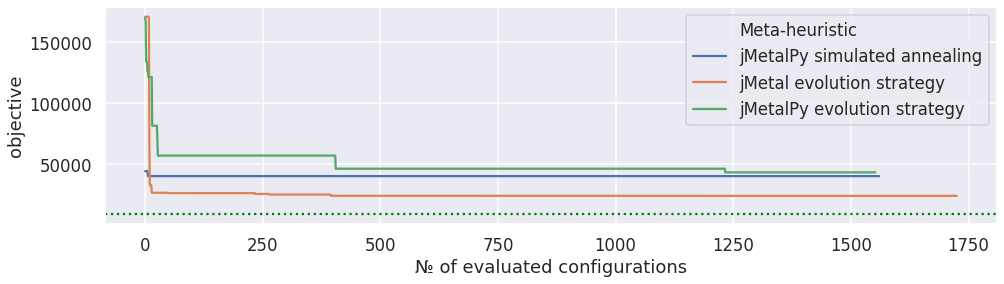

In [6]:
g = sns.lineplot(x="№ of evaluated configurations", y="objective", hue="Meta-heuristic", data=progresses)
g.axes.axhline(8806, color='green', ls=':').set_label("optimum")

plt.savefig(fname=f"{plots_folder}tuning progress.svg", bbox_inches='tight')

## jMetalPy Evolution strategy

#### Numerical parameters distributions and results.

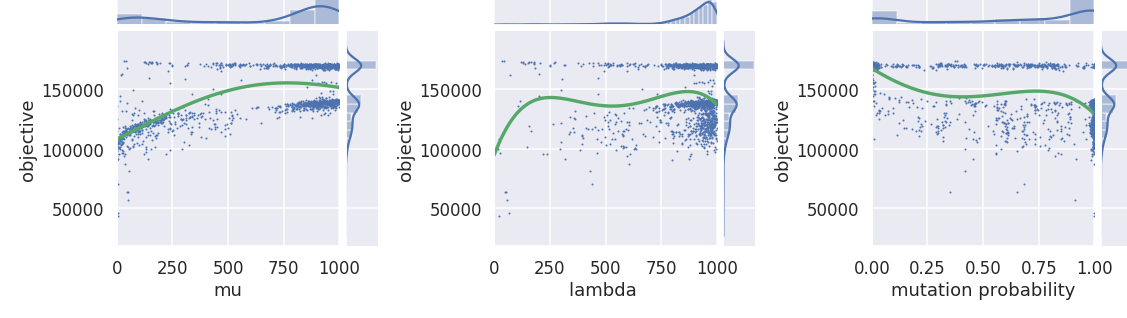

In [7]:
pyes_data = chronics[chronics["Meta-heuristic"] == "jMetalPy evolution strategy"]

joint_plot_kws = {"scatter_kws": {'color':'b', 's':1, 'alpha': 1}, "line_kws": {'color':'g'}, 'order': 4, 'ci': None, 'x_ci': None}

mu_py_es = sns.jointplot(x="mu", y="objective", kind='reg', height=5,
                         xlim=[0,1000], joint_kws=joint_plot_kws, data=pyes_data)

lambd_py_es = sns.jointplot(x="lambda ", y="objective", kind='reg', height=5,
                            xlim=[0,1000], joint_kws=joint_plot_kws, data=pyes_data)

mut_prob_py_es = sns.jointplot(x="mutation probability",y="objective", kind='reg', height=5,
                               xlim=[0,1], joint_kws=joint_plot_kws, data=pyes_data)
# joining subfigures into one figure
fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3)
mg0 = sfg(mu_py_es, fig, gs[0])
mg1 = sfg(lambd_py_es, fig, gs[1])
mg2 = sfg(mut_prob_py_es, fig, gs[2])

gs.tight_layout(fig)
gs.update(top=0.9)

plt.savefig(fname=f"{plots_folder}jMetalPy evolution strategy numeric parameters.svg", bbox_inches='tight')

#### Categorical parameters distributions and results.

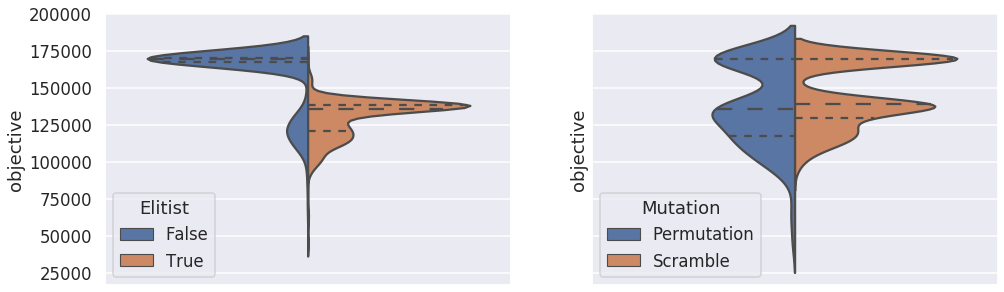

In [8]:
# numerical parameters of jMetalPy Evolution strategy
pyes_cat_params_data = chronics[chronics["Meta-heuristic"] == "jMetalPy evolution strategy"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), sharey=True)

elitist = sns.violinplot(x="Meta-heuristic", y="objective", hue="elitist", inner="quartile",
                         split=True, ax=axes[0], data=pyes_cat_params_data)

elitist.legend(title="Elitist", loc='lower left')
elitist.set_xlabel('')
elitist.set_xticklabels([''])

mutation = sns.violinplot(x="Meta-heuristic", y="objective", hue="mutation", inner="quartile",
                         split=True, ax=axes[1], data=pyes_cat_params_data)

mutation.legend(title="Mutation", loc='lower left')
mutation.set_xlabel('')
mutation.set_xticklabels([''])

plt.savefig(fname=f"{plots_folder}jMetalPy evolution strategy categorical parameters.svg", bbox_inches='tight')

## jMetal Evolution strategy

#### Numerical parameters distributions and results.

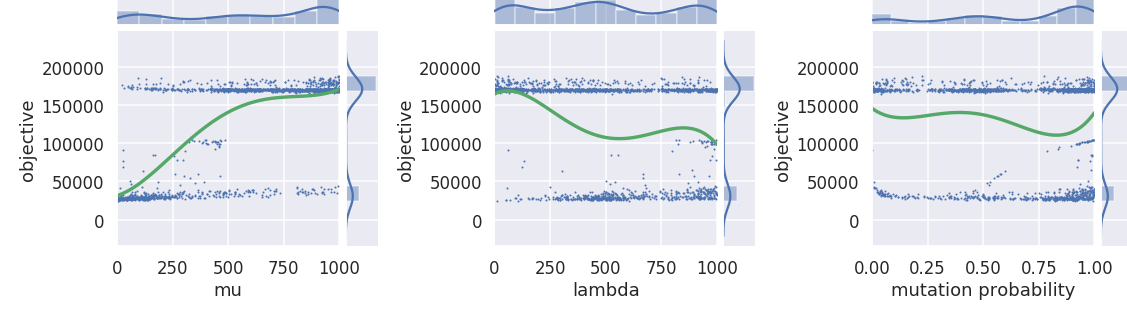

In [9]:
jes_num_params = chronics[chronics["Meta-heuristic"] == "jMetal evolution strategy"]
joint_plot_kws = {"scatter_kws": {'color':'b', 's':1, 'alpha': 1}, "line_kws": {'color':'g'}, 'order': 4, 'ci': None, 'x_ci': None}

mu_py_es = sns.jointplot(x="mu", y="objective", kind='reg', height=5,
                  xlim=[0,1000], joint_kws=joint_plot_kws, data=jes_num_params)

lambd_py_es = sns.jointplot(x="lambda", y="objective", kind='reg', height=5,
                  xlim=[0,1000], joint_kws=joint_plot_kws, data=jes_num_params)

mut_prob_py_es = sns.jointplot(x="mutation probability", y="objective", kind='reg', height=5,
                  xlim=[0,1], joint_kws=joint_plot_kws, data=jes_num_params)

fig = plt.figure(figsize=(16,5))
gs = gridspec.GridSpec(1, 3)
mg0 = sfg(mu_py_es, fig, gs[0])
mg1 = sfg(lambd_py_es, fig, gs[1])
mg2 = sfg(mut_prob_py_es, fig, gs[2])

gs.tight_layout(fig)
gs.update(top=0.9)

plt.savefig(fname=f"{plots_folder}jMetal evolution strategy numeric parameters.svg", bbox_inches='tight')

#### Categorical parameter (elitist) distributions and results.

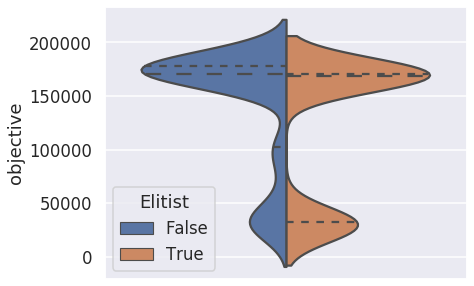

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5), sharey=True)
jes_cat_param = chronics[chronics["Meta-heuristic"] == "jMetal evolution strategy"]
#print(d)
elitist = sns.violinplot(x="Meta-heuristic", y="objective", hue="elitist", inner="quartile",
                         split=True, ax=axes, data=jes_cat_param)

elitist.legend(title="Elitist",loc='lower left')
elitist.set_xlabel('')
elitist.set_xticklabels([''])
plt.savefig(fname=f"{plots_folder}jMetal evolution strategy categorical parameters.svg", bbox_inches='tight')

## jMetalPy simulated annealing

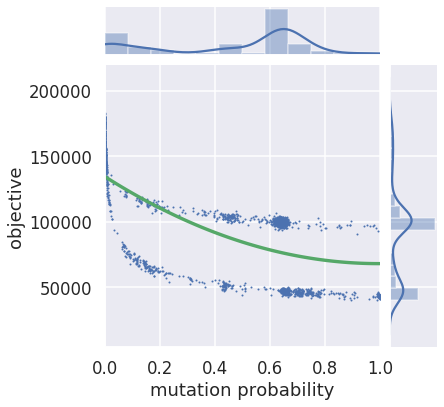

In [13]:
# mutation probability

mut_prob_py_es = sns.jointplot(x="mutation probability", y="objective", kind='reg', height=6,
                               xlim=[0,1],
                               joint_kws={"scatter_kws": {'color':'b', 's':1, 'alpha': 1}, "line_kws": {'color':'g'}, 'order': 2, 'ci': None, 'x_ci': None},
                               data=chronics[chronics["Meta-heuristic"] == "jMetalPy simulated annealing"]
                              )
mut_prob_py_es.set_axis_labels('mutation probability', 'objective')
plt.savefig(fname=f"{plots_folder}jMetalPy simulated annealing numeric parameters.svg", bbox_inches='tight')

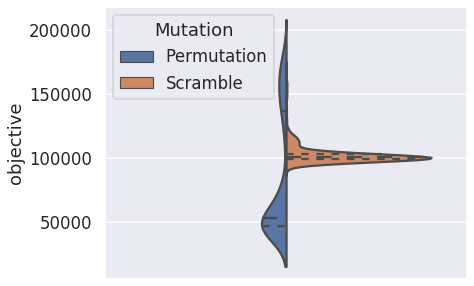

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.5, 5), sharey=True)

mutaton_type = sns.violinplot(x="Meta-heuristic", y="objective", hue="mutation", 
                         inner="quartile", split=True, ax=axes,
                         data=chronics[chronics["Meta-heuristic"] == "jMetalPy simulated annealing"]
                        )

mutaton_type.legend(title="Mutation",loc='upper left')
mutaton_type.set_xlabel('')
mutaton_type.set_xticklabels([''])
plt.savefig(fname=f"{plots_folder}jMetalPy simulated annealing categorical parameters.svg", bbox_inches='tight')